In [1]:
import prepare
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


Reading from csv...
Reading from csv...
Reading from csv...


In [2]:
#function currently in prepare.py, will move to explore.py
df = prepare.prep_telco()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   is_female                               7032 non-null   int64  
 1   senior_citizen                          7032 non-null   int64  
 2   partner                                 7032 non-null   int64  
 3   dependents                              7032 non-null   int64  
 4   tenure                                  7032 non-null   int64  
 5   phone_service                           7032 non-null   int64  
 6   multiple_lines                          7032 non-null   int64  
 7   online_security                         7032 non-null   int64  
 8   online_backup                           7032 non-null   int64  
 9   device_protection                       7032 non-null   int64  
 10  tech_support                            7032 non-null   int6

In [3]:
# function to split, will copy to explore.py when done
def split_continuous(df,y_value):   
    train, test = train_test_split(
        df, test_size=0.2, random_state=42
    )
    train, validate = train_test_split(
        train, test_size=0.3, random_state=42
    )
    # into x and y
    x_train = train.drop(columns=[y_value])
    y_train = train[y_value]
    x_validate = validate.drop(columns=[y_value])
    y_validate = validate[y_value]
    x_test = test.drop(columns=[y_value])
    y_test = test[y_value]
    return x_train, y_train, x_validate, y_validate, x_test, y_test, train, test, validate


In [4]:
# call function to split data
x_train, y_train, x_validate, y_validate, x_test, y_test, train, test, validate = split_continuous(df, 'total_charges')

In [5]:
train.columns

Index(['is_female', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'autopay', 'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

In [6]:
# take in df and list of columns to make pair plot
def plot_variable_pairs(df,columns):
    #pair plot with reg line
    sns.pairplot(df[columns], corner=True, kind = 'reg',plot_kws={'line_kws':{'color':'blue'}})
    plt.show()

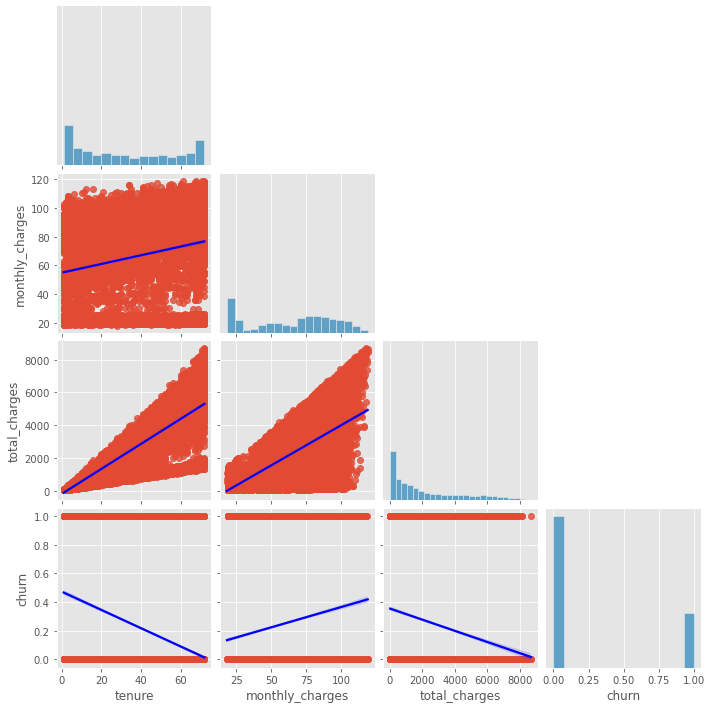

In [7]:
# pick columns for pairplot, I chose the numerical non categorical with the exception of churn
columns = ['tenure','monthly_charges', 'total_charges','churn']
#call the function to display
plot_variable_pairs(df,columns)


In [8]:
df_test = df.copy()
df_test['tenure_years']=(df['tenure']/12).round().astype(int)
df_test

,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_years
0,1,0,1,1,9,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
1,0,0,0,0,9,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,1,1,0,13,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,0,3,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,13,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
7039,0,0,1,0,22,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,2
7040,0,0,0,0,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
7041,0,0,1,1,67,1,0,1,0,1,...,0,1,1,0,0,0,0,0,1,6


In [9]:
def months_to_years(df):
    # add tenure_years columns and set it to nearest whole year, converted to int
    df['tenure_years']=(df['tenure']/12).round().astype(int)
    return df

In [13]:
df = months_to_years(df)
df

,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_years
0,1,0,1,1,9,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
1,0,0,0,0,9,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,1,1,0,13,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,0,3,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,13,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
7039,0,0,1,0,22,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,2
7040,0,0,0,0,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
7041,0,0,1,1,67,1,0,1,0,1,...,0,1,1,0,0,0,0,0,1,6


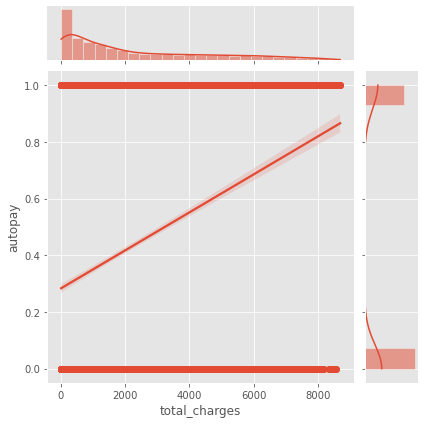

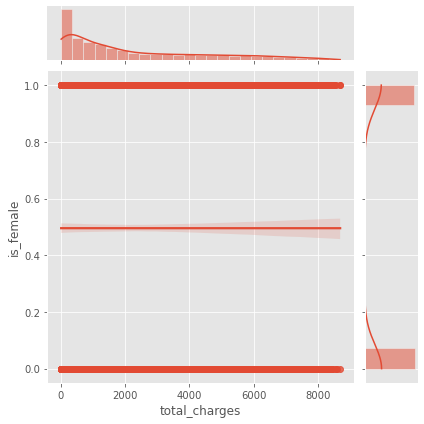

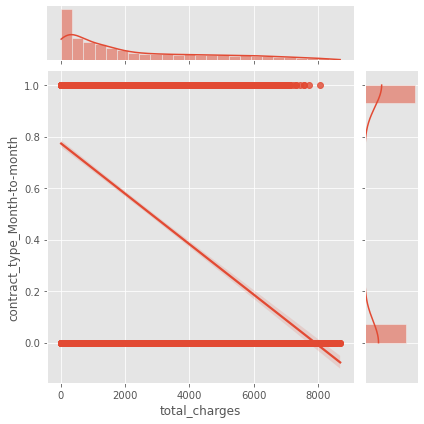

In [23]:
columns = ['total_charges', 'autopay','is_female','contract_type_Month-to-month']
sns.jointplot(kind ='reg', data = df[columns], x = columns[0], y = columns[1])
sns.jointplot(kind ='reg', data = df[columns], x = columns[0], y = columns[2])
sns.jointplot(kind ='reg', data = df[columns], x = columns[0], y = columns[3])

In [24]:
def plot_categorical_and_continuous_vars(df, columns):
    sns.jointplot(kind ='reg', data = df[columns], x = columns[0], y = columns[1])
    sns.jointplot(kind ='reg', data = df[columns], x = columns[0], y = columns[2])
    sns.jointplot(kind ='reg', data = df[columns], x = columns[0], y = columns[3])

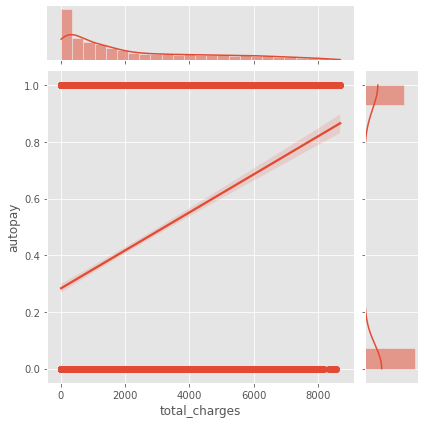

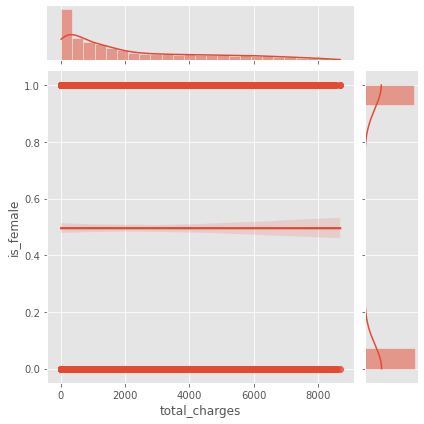

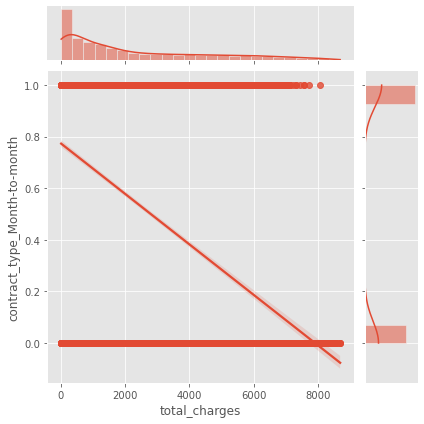

In [25]:
columns = ['total_charges', 'autopay','is_female','contract_type_Month-to-month']
plot_categorical_and_continuous_vars(df, columns)